# Логистическая регрессия #

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
%matplotlib inline
# plt.style.use('seaborn')

In [2]:
diabetes_data = pd.read_csv('data/diabetes_cleaned.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,35.7,0.148,21,0
2,2,108.0,64.0,29.0,30.8,0.158,21,0
3,8,107.0,80.0,29.0,24.6,0.856,34,0
4,7,136.0,90.0,29.0,29.9,0.210,50,0


- **Pregnancies**&nbsp;&mdash; количество беременностей
- **Glucose**&nbsp;&mdash; концентрация глюкозы в плазме через два часа при пероральном тесте на толерантность к глюкозе
- **BloodPressure**&nbsp;&mdash; диастолическое артериальное давление (мм рт. ст.)
- **SkinThickness**&nbsp;&mdash; толщина кожной складки трицепса (мм)
- **BMI**&nbsp;&mdash; индекс массы тела ($вес_в_кг/(рост_в_м)^2$)
- **DiabetesPedigreeFunction**&nbsp;&mdash; функция родословной диабета (чем она выше, тем выше шанс наследственной заболеваемости)
- **Age**&nbsp;&mdash; возраст
- **Outcome**&nbsp;&mdash; наличие диабета (0&nbsp;&mdash; нет, 1&nbsp;&mdash; да), **целевой признак**

In [3]:
print(diabetes_data.shape)

(757, 8)


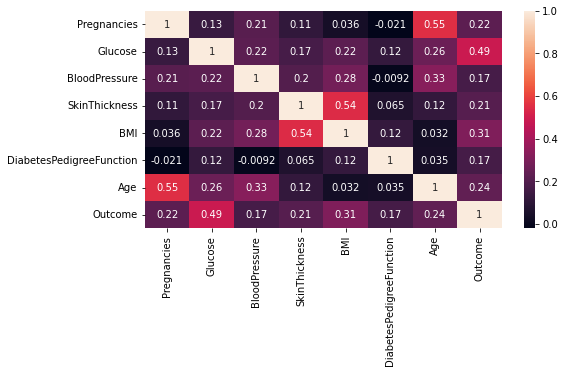

In [4]:
fig, ax = plt.subplots(figsize = (8, 4))
sns.heatmap(diabetes_data.corr(), annot=True);

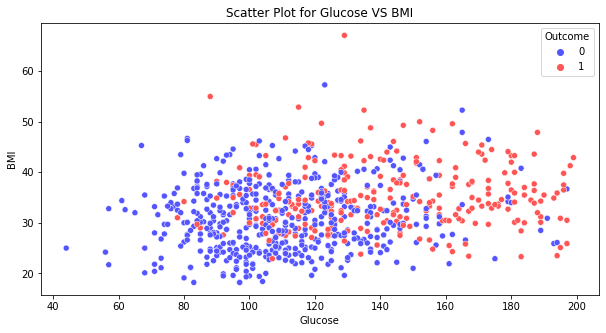

In [5]:
fig, ax = plt.subplots(figsize = (10, 5))
sns.scatterplot(
    data=diabetes_data,
    x='Glucose',
    y='BMI',
    hue='Outcome',
    palette='seismic',
    ax=ax
)
ax.set_title('Scatter Plot for Glucose VS BMI');

In [29]:
# Матрица наблюдений X и столбец с ответами y
X = diabetes_data[['Glucose', 'BMI']]
y = diabetes_data['Outcome']

In [30]:
# Объект класса логистическая регрессия
log_reg_2d = linear_model.LogisticRegression(random_state=42)
# Обучение модели
log_reg_2d.fit(X, y)

# Результирующие коэффициенты
print(f'w0: {log_reg_2d.intercept_}') #свободный член w0
print(f'w1, w2: {log_reg_2d.coef_}') #остальные параметры модели w1, w2, ..., wm

w0: [-8.24898965]
w1, w2: [[0.03779275 0.0875742 ]]


In [8]:
# Значения концентации глюкозы и индекса массы тела для пациента
x_new = [[180, 51]]
# Предсказание вероятностей
y_new_proba_predict = log_reg_2d.predict_proba(x_new)
print(f'Predicted probabilities: {np.round(y_new_proba_predict, 2)}')

Predicted probabilities: [[0.05 0.95]]


C:\Programs\Python39\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [9]:
# Значения концентации глюкозы и индекса массы тела для пациента
x_new = [[180, 51]]
# Предсказание класса
y_new_predict = log_reg_2d.predict(x_new)
print(f'Predicted class: {y_new_predict}')

Predicted class: [1]


C:\Programs\Python39\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Функция визуализации вероятности в виде тепловой карты ##

In [10]:
def plot_probabilities_2d(X, y, model):
    # Генерирует координатную сетку из всех возможных значений для признаков
    # Glucose изменяется от x1_min = 44 до x2_max = 199, 
    # BMI - от x2_min = 18.2 до x2_max = 67.1
    # Результат работы функции - два массива xx1 и xx2, которые образуют координатную сетку
    xx1, xx2 = np.meshgrid(
        np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 0.1),
        np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 0.1)
    )
    # Вытягивает каждый из массивов в вектор-столбец - reshape(-1, 1)
    # Объединяет два столбца в таблицу с помощью hstack
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    
    # Предсказывает вероятность для всех точек на координатной сетке
    # Нужна только вероятность класса 1
    probs = model.predict_proba(X_net)[:, 1]
    
    # Переводит столбец из вероятностей в размер координатной сетки
    probs = probs.reshape(xx1.shape)
    
    fig, ax = plt.subplots(figsize = (10, 5))
    # Тепловая карта вероятностей
    contour = ax.contourf(xx1, xx2, probs, 100, cmap='bwr')
    # Разделяющая плоскость - линия, где вероятность равна 0.5
    bound = ax.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');
    # Цветовая панель 
    colorbar = fig.colorbar(contour)
    # Накладка поверх тепловой карты диаграммы рассеяния
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, palette='seismic', ax=ax)
    ax.set_title('Scatter Plot with Decision Boundary');
    # Смещение легенды в верхний левый угол вне графика
    ax.legend(bbox_to_anchor=(-0.05, 1))

C:\Programs\Python39\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


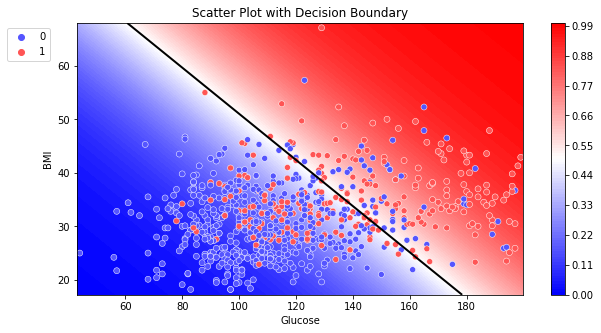

In [11]:
plot_probabilities_2d(X, y, log_reg_2d)

In [12]:
# Полная матрица признаков X и столбец с ответами y
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

In [13]:
log_reg_full = linear_model.LogisticRegression(random_state=42, max_iter=1000)
log_reg_full.fit(X, y)
y_pred = log_reg_full.predict(X)
X_temp = X.copy()
X_temp['Prediction'] = y_pred
X_temp.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Prediction
752,5,139.0,64.0,35.0,28.6,0.411,26,0
753,1,96.0,122.0,29.0,22.4,0.207,27,0
754,10,101.0,86.0,37.0,45.6,1.136,38,1
755,0,141.0,72.0,29.0,42.4,0.205,29,1
756,0,125.0,96.0,29.0,22.5,0.262,21,0


In [26]:
# Предсказание моделью, обученной на двух факторах
y_pred1 = log_reg_2d.predict(diabetes_data[['Glucose', 'BMI']])

# Предсказание моделью, обученной на всех факторах
y_pred2 = log_reg_full.predict(diabetes_data.drop('Outcome', axis=1))

###  Задание 2.9 ###

Таблица состоит из трёх столбцов:
- **X_1** и **X_2**&nbsp;&mdash; факторы
- **y**&nbsp;&mdash; целевой признак

Обучить модель логистической регрессии для предсказания целевого признака **y**. В качестве алгоритма оптимизации использовать стохастический градиентный спуск (масштабировать данные не нужно). В качестве значения параметра `random_state` взять число **42**, остальные параметры оставить по умолчанию.

Воспользоваться функцией `plot_probabilities_2d()`, которую объявили ранее. Построить визуализацию разделяющей поверхности.

Сколько объектов класса 0 будут неверно отнесены моделью к классу 1?

***Ответ - 6***

In [15]:
task_df = pd.read_csv('data/task_data.csv')
display(task_df)

,SNo,X_1,X_2,y
0,0,-0.869144,0.389310,0.0
1,1,-0.993467,-0.610591,0.0
2,2,-0.834064,0.239236,0.0
3,3,-0.136471,0.632003,1.0
4,4,0.403887,0.310784,1.0
...,...,...,...,...
95,95,0.531635,-0.479185,1.0
96,96,-0.650192,0.655303,1.0
97,97,0.985299,0.118333,1.0
98,98,-0.275289,0.005730,1.0


In [16]:
task_df.drop(columns='SNo', inplace=True)
display(task_df)

,X_1,X_2,y
0,-0.869144,0.389310,0.0
1,-0.993467,-0.610591,0.0
2,-0.834064,0.239236,0.0
3,-0.136471,0.632003,1.0
4,0.403887,0.310784,1.0
...,...,...,...
95,0.531635,-0.479185,1.0
96,-0.650192,0.655303,1.0
97,0.985299,0.118333,1.0
98,-0.275289,0.005730,1.0


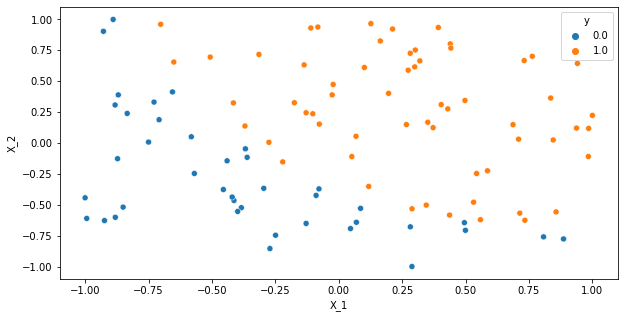

In [17]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(
    data=task_df,
    x='X_1',
    y='X_2',
    hue='y',
    ax=ax
);

In [18]:
X, y = task_df[['X_1', 'X_2']], task_df['y']

grad_down = linear_model.LogisticRegression(random_state=42)
# grad_down = linear_model.LogisticRegression(solver='sag', random_state=42)
grad_down.fit(X, y)
print(f'w0: {grad_down.intercept_}')
print(f'w1, w2: {grad_down.coef_}')

w0: [0.55527306]
w1, w2: [[2.80998972 2.58775088]]


C:\Programs\Python39\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


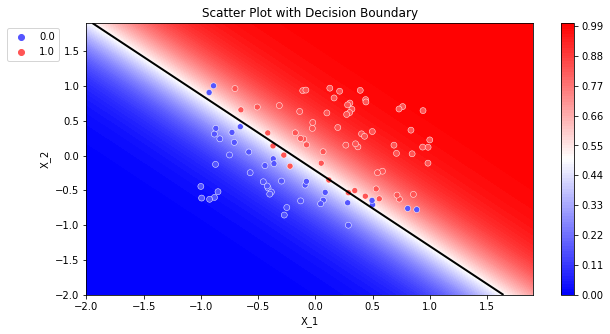

In [19]:
plot_probabilities_2d(X, y, grad_down)

In [20]:
# Значения концентации глюкозы и индекса массы тела для пациента
x_new = [[-0.869, 0.389]]
# Предсказание вероятностей
y_new_proba_predict = grad_down.predict_proba(x_new)
print(f'Predicted probabilities: {np.round(y_new_proba_predict, 2)}')

# Значения концентации глюкозы и индекса массы тела для пациента
x_new = [[-0.869, 0.389]]
# Предсказание класса
y_new_predict = grad_down.predict(x_new)
print(f'Predicted class: {y_new_predict}')

Predicted probabilities: [[0.71 0.29]]
Predicted class: [0.]


C:\Programs\Python39\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Programs\Python39\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [21]:
task_df['y_prediction'] = task_df.apply(lambda x: grad_down.predict([[x['X_1'], x['X_2']]])[0], axis=1)

C:\Programs\Python39\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Programs\Python39\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Programs\Python39\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Programs\Python39\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Programs\Python39\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Programs\Python39\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid featu

In [22]:
task_df.head()

,X_1,X_2,y,y_prediction
0,-0.869144,0.389310,0.0,0.0
1,-0.993467,-0.610591,0.0,0.0
2,-0.834064,0.239236,0.0,0.0
3,-0.136471,0.632003,1.0,1.0
4,0.403887,0.310784,1.0,1.0


In [23]:
err_num = task_df[(task_df.y_prediction == 1.0) & (task_df.y == 0.0)].shape[0]
print(f'{err_num} объектов класса 0 неверно отнесены моделью к классу 1')

6 объектов класса 0 неверно отнесены моделью к классу 1


## РАСЧЁТ МЕТРИК НА PYTHON ##

In [35]:
# Матрица наблюдений X и столбец с ответами y
X_2d = diabetes_data[['Glucose', 'BMI']]
y_2d = diabetes_data['Outcome']

In [36]:
# Объект класса логистическая регрессия
log_reg_2d = linear_model.LogisticRegression(random_state=42)
# Обучение модели
log_reg_2d.fit(X_2d, y_2d)

LogisticRegression(random_state=42)

In [37]:
# Полная матрица признаков X и столбец с ответами y
X_full = diabetes_data.drop('Outcome', axis=1)
y_full = diabetes_data['Outcome']

In [38]:
log_reg_full = linear_model.LogisticRegression(random_state=42, max_iter=1000)
log_reg_full.fit(X_full, y_full)
# y_full_pred = log_reg_full.predict(X_full)
# X_full_temp = X_full.copy()
# X_full_temp['Prediction'] = y_full_pred
# X_full_temp.tail()

LogisticRegression(max_iter=1000, random_state=42)

In [39]:
# Предсказание моделью, обученной на двух признаках
y_pred1 = log_reg_2d.predict(diabetes_data[['Glucose', 'BMI']])
# Предсказание моделью, обученной на всех признаках
y_pred2 = log_reg_full.predict(diabetes_data.drop('Outcome', axis=1))

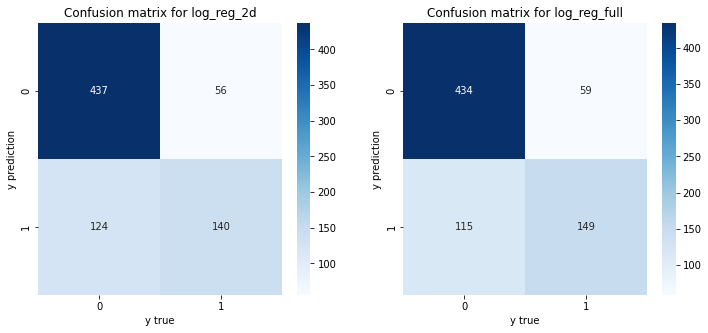

In [40]:
# Матрицы ошибок для каждой из моделей
confusion_matrix1 = metrics.confusion_matrix(y_2d, y_pred1)
confusion_matrix2 = metrics.confusion_matrix(y_full, y_pred2)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(
    confusion_matrix1,
    annot=True,
    fmt='',
    cmap='Blues',
    ax=axes[0]
)
sns.heatmap(
    confusion_matrix2,
    annot=True,
    fmt='',
    cmap='Blues',
    ax=axes[1]
)
axes[0].set_title('Confusion matrix for log_reg_2d')
axes[0].set_xlabel('y true')
axes[0].set_ylabel('y prediction')
axes[1].set_title('Confusion matrix for log_reg_full')
axes[1].set_xlabel('y true')
axes[1].set_ylabel('y prediction');

Расчёт метрик для модели `log_reg_2d`, обученной на двух факторах — Glucose и BMI:

In [43]:
print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y_2d, y_pred1)))
print('Precision: {:.2f}'.format(metrics.precision_score(y_2d, y_pred1)))
print('Recall: {:.2f}'.format(metrics.recall_score(y_2d, y_pred1)))
print('F1 score: {:.2f}'.format(metrics.f1_score(y_2d, y_pred1)))

Accuracy: 0.76
Precision: 0.71
Recall: 0.53
F1 score: 0.61


Расчёт метрик для модели `log_reg_full`, обученной на всех доступных факторах:

In [42]:
print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y_full, y_pred2)))
print('Precision: {:.2f}'.format(metrics.precision_score(y_full, y_pred2)))
print('Recall: {:.2f}'.format(metrics.recall_score(y_full, y_pred2)))
print('F1 score: {:.2f}'.format(metrics.f1_score(y_full, y_pred2)))

Accuracy: 0.77
Precision: 0.72
Recall: 0.56
F1 score: 0.63


Можно использовать функцию `classification_report()` из модуля `metrics`. Она возвращает отчёт обо всех метриках классификации:

In [44]:
print(metrics.classification_report(y_full, y_pred2))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       493
           1       0.72      0.56      0.63       264

    accuracy                           0.77       757
   macro avg       0.75      0.72      0.73       757
weighted avg       0.76      0.77      0.76       757



## Вариации порога принятия решений (вместо стандартного 0.5) ##

In [48]:
y_proba_pred = log_reg_full.predict_proba(diabetes_data.drop('Outcome', axis=1))[:, 1]
y_proba_pred = pd.Series(y_proba_pred)
recall_scores = []
precision_scores = []
f1_scores = []
thresholds = np.arange(0.1, 1, 0.05)
for threshold in thresholds:
    y_pred = y_proba_pred.apply(lambda x: 1 if x>threshold else 0)
    recall_scores.append(metrics.recall_score(y, y_pred))
    precision_scores.append(metrics.precision_score(y, y_pred))
    f1_scores.append(metrics.f1_score(y, y_pred))

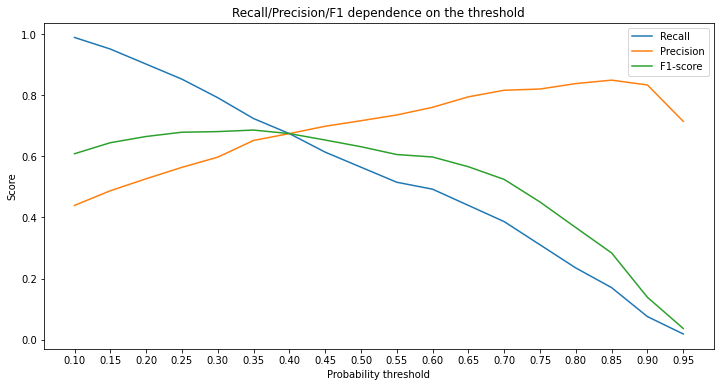

In [50]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(
    thresholds,
    recall_scores,
    label='Recall'
)
ax.plot(
    thresholds,
    precision_scores,
    label='Precision'
)
ax.plot(
    thresholds,
    f1_scores,
    label='F1-score'
)
ax.set_title('Recall/Precision/F1 dependence on the threshold')
ax.set_xlabel('Probability threshold')
ax.set_ylabel('Score')
# Отметки по оси x
ax.set_xticks(thresholds) 
ax.legend();

In [51]:
# Задание оптимального порогавероятностей
threshold_opt = 0.35
# Пациенты, у которых вероятность наличия диабета > threshold_opt, относятся к классу 1
# В противном случае -- к классу 0
y_pred_opt = y_proba_pred.apply(lambda x: 1 if x > threshold_opt else 0)
# Подсчёт метрик
print(metrics.classification_report(y, y_pred_opt))

              precision    recall  f1-score   support

           0       0.84      0.79      0.82       493
           1       0.65      0.72      0.69       264

    accuracy                           0.77       757
   macro avg       0.75      0.76      0.75       757
weighted avg       0.78      0.77      0.77       757



###  Задание 3.6 ###

Есть истинные ответы `y_true` = [0, 0, 1, 1, 1, 1, 0, 1] и предсказанные ответы `y_pred` = [0, 1, 0, 0, 1, 1, 0, 1].
Вычислить значение метрики `precision`. Ответ округлить до сотых.

***Ответ - 0.75***

In [45]:
y_true3 = [0, 0, 1, 1, 1, 1, 0, 1]
y_pred3 = [0, 1, 0, 0, 1, 1, 0, 1]
print('Precision: {:.2f}'.format(metrics.precision_score(y_true3, y_pred3)))

Precision: 0.75


###  Задание 3.7 ###

Есть истинные ответы `y_true` = [0, 0, 1, 1, 1, 1, 0, 1] и предсказанные ответы `y_pred` = [0, 1, 0, 0, 1, 1, 0, 1]. Вычислить значение метрики `recall`. Ответ округлить до сотых.

***Ответ - 0.60***

In [46]:
y_true4 = [0, 0, 1, 1, 1, 1, 0, 1]
y_pred4 = [0, 1, 0, 0, 1, 1, 0, 1]
print('Recall: {:.2f}'.format(metrics.recall_score(y_true4, y_pred4)))

Recall: 0.60


###  Задание 3.8 ###

Есть истинные ответы `y_true` = [0, 0, 1, 1, 1, 1, 0, 1] и предсказанные ответы `y_pred` = [0, 1, 0, 0, 1, 1, 0, 1]. Вычислить значение метрики $F_1$. Ответ округлить до сотых.

***Ответ - 0.67***

In [47]:
y_true5 = [0, 0, 1, 1, 1, 1, 0, 1]
y_pred5 = [0, 1, 0, 0, 1, 1, 0, 1]
print('F1 score: {:.2f}'.format(metrics.f1_score(y_true5, y_pred5)))

F1 score: 0.67


## Мультиклассовая классификация на Python ##

In [6]:
penguins_data = sns.load_dataset('penguins')
penguins_data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [7]:
penguins_data.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [8]:
penguins_data.dropna(inplace=True)

In [12]:
X_pen = penguins_data.drop('species', axis=1)
y_pen = penguins_data['species']
X_pen.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Torgersen,39.3,20.6,190.0,3650.0,Male


In [13]:
X_dummies = pd.get_dummies(X_pen)
X_dummies.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
0,39.1,18.7,181.0,3750.0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,0,0,1,1,0
4,36.7,19.3,193.0,3450.0,0,0,1,1,0
5,39.3,20.6,190.0,3650.0,0,0,1,0,1


In [14]:
log_reg = linear_model.LogisticRegression(
    multi_class='multinomial',
    max_iter=1000,
    random_state=42
)
log_reg.fit(X_dummies, y_pen)
y_pen_pred_proba = np.round(log_reg.predict_proba(X_dummies), 2)
y_pen_pred = log_reg.predict(X_dummies)

Таблица вероятностей для каждого класса и финального предсказания. Выбраны пять случайных строк из таблицы с помощью метода `sample()`.

In [15]:
y_pen_pred_proba_df = pd.DataFrame(
    y_pen_pred_proba, 
    columns=['Adelie', 'Chinstrap', 'Gentoo']
)
y_pen_pred_df = pd.DataFrame(
    y_pen_pred, 
    columns=['Predicted Class']
)
y_df = pd.concat([y_pen_pred_proba_df, y_pen_pred_df], axis=1)
y_df.sample(5, random_state=2)

,Adelie,Chinstrap,Gentoo,Predicted Class
277,0.00,0.00,1.0,Gentoo
223,0.00,0.00,1.0,Gentoo
7,0.79,0.21,0.0,Adelie
160,0.00,1.00,0.0,Chinstrap
65,1.00,0.00,0.0,Adelie


In [16]:
print(metrics.classification_report(y_pen, y_pen_pred))

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       146
   Chinstrap       1.00      1.00      1.00        68
      Gentoo       1.00      1.00      1.00       119

    accuracy                           1.00       333
   macro avg       1.00      1.00      1.00       333
weighted avg       1.00      1.00      1.00       333

